<h1>Modelos computacionales I.
<h2>Unidad de probabilidad y estadıstica.

<h3>Práctica 1.Carolina Bernal Rodríguez

Cada archivo tiene cuatro bloques, y cada bloque representa una condición experimental
o “clase” distinta. Los bloques estan separados por una salto de línea (una línea sin
nada). Cada línea con datos representa una repetición de la tarea o un “ensayo”. Las
lineas son secuencias de números separados por comas: cada numero es un tiempo. Los
bloques están formados por 15 ensayos, por lo que hay un total de 60 ensayos.

<ul>
<li>Calcule y grafique la tasa de disparo en pasos de 10 ms utilizando una ventana causal, cuadrada y de longitud de 50 ms. </li>
<li>Ahora, utilice ventanas de 200 ms de duración con pasos de 50 ms.</li>
<li>Por  ́ultimo, haz lo mismo pero con ventanas de 400 ms y pasos de 50ms.</li>
<li>De acuerdo a tus observaciones, ¿cu ́al es la mejor ventana para cada una de las  ́areas cerebrales (DPC y S1)?</li>
</ul>

In [1]:
#Importamos las librerías. 
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 

In [2]:
#Leemos el archivo csv. 
tiempos_neudpc_1 = pd.read_csv('Desktop/Practica1_Estadistica/TiemposNeuDPC1.csv',header=None, sep='\n')

In [3]:
tiempos_neudpc_1 #Esta es la tabla generada, incluye los 60 ensayos totales. 

,0
0,"-1.9919,-1.977,-1.9588,-1.9228,-1.9172,-1.8944..."
1,"-1.9962,-1.9679,-1.9462,-1.8988,-1.8923,-1.887..."
2,"-1.9797,-1.9321,-1.892,-1.8634,-1.833,-1.7177,..."
3,"-1.9483,-1.829,-1.7738,-1.7216,-1.6944,-1.6868..."
4,"-1.9583,-1.9484,-1.8986,-1.8862,-1.8469,-1.827..."
5,"-1.9815,-1.9272,-1.9143,-1.9126,-1.8626,-1.860..."
6,"-1.98,-1.9732,-1.8447,-1.7751,-1.74,-1.7,-1.69..."
7,"-1.9953,-1.9798,-1.9673,-1.9566,-1.9373,-1.921..."
8,"-1.9383,-1.929,-1.8984,-1.8543,-1.7851,-1.7032..."
9,"-1.9958,-1.9817,-1.9683,-1.9403,-1.9364,-1.907..."


<h3> Clase 1

In [4]:
#Seleccionamos la primera clase (correspondiente a los primeros 15 ensayos)
clase1 = tiempos_neudpc_1[0:15] 

In [5]:
clase1 #observamos los valores de la primera clase 

,0
0,"-1.9919,-1.977,-1.9588,-1.9228,-1.9172,-1.8944..."
1,"-1.9962,-1.9679,-1.9462,-1.8988,-1.8923,-1.887..."
2,"-1.9797,-1.9321,-1.892,-1.8634,-1.833,-1.7177,..."
3,"-1.9483,-1.829,-1.7738,-1.7216,-1.6944,-1.6868..."
4,"-1.9583,-1.9484,-1.8986,-1.8862,-1.8469,-1.827..."
5,"-1.9815,-1.9272,-1.9143,-1.9126,-1.8626,-1.860..."
6,"-1.98,-1.9732,-1.8447,-1.7751,-1.74,-1.7,-1.69..."
7,"-1.9953,-1.9798,-1.9673,-1.9566,-1.9373,-1.921..."
8,"-1.9383,-1.929,-1.8984,-1.8543,-1.7851,-1.7032..."
9,"-1.9958,-1.9817,-1.9683,-1.9403,-1.9364,-1.907..."


In [6]:
clase1[0] #El formato de la tabla cuenta únicamente con una sola columna 

0     -1.9919,-1.977,-1.9588,-1.9228,-1.9172,-1.8944...
1     -1.9962,-1.9679,-1.9462,-1.8988,-1.8923,-1.887...
2     -1.9797,-1.9321,-1.892,-1.8634,-1.833,-1.7177,...
3     -1.9483,-1.829,-1.7738,-1.7216,-1.6944,-1.6868...
4     -1.9583,-1.9484,-1.8986,-1.8862,-1.8469,-1.827...
5     -1.9815,-1.9272,-1.9143,-1.9126,-1.8626,-1.860...
6     -1.98,-1.9732,-1.8447,-1.7751,-1.74,-1.7,-1.69...
7     -1.9953,-1.9798,-1.9673,-1.9566,-1.9373,-1.921...
8     -1.9383,-1.929,-1.8984,-1.8543,-1.7851,-1.7032...
9     -1.9958,-1.9817,-1.9683,-1.9403,-1.9364,-1.907...
10    -1.9332,-1.9218,-1.8991,-1.8635,-1.8176,-1.784...
11    -1.9928,-1.9504,-1.9211,-1.9089,-1.8874,-1.882...
12    -1.9314,-1.8974,-1.8951,-1.8544,-1.7485,-1.727...
13    -1.8479,-1.7454,-1.5925,-1.5882,-1.569,-1.5567...
14    -1.9458,-1.9403,-1.9337,-1.9226,-1.9088,-1.880...
Name: 0, dtype: object

In [7]:
#Separamos cada valor por comas de cada renglón para obtener nuestra tabla a analizar de la primera clase 
clase1_mod = clase1[0].str.split(',', expand=True)

In [8]:
clase1_mod #tabla de la primera clase, fueron realizados 15 ensayos 

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.9919,-1.977,-1.9588,-1.9228,-1.9172,-1.8944,-1.8911,-1.8376,-1.8349,-1.7964,...,None,None,None,None,None,None,None,None,None,None
1,-1.9962,-1.9679,-1.9462,-1.8988,-1.8923,-1.887,-1.8745,-1.8532,-1.7585,-1.7564,...,None,None,None,None,None,None,None,None,None,None
2,-1.9797,-1.9321,-1.892,-1.8634,-1.833,-1.7177,-1.7141,-1.7036,-1.6348,-1.5294,...,None,None,None,None,None,None,None,None,None,None
3,-1.9483,-1.829,-1.7738,-1.7216,-1.6944,-1.6868,-1.6035,-1.5849,-1.5764,-1.5473,...,None,None,None,None,None,None,None,None,None,None
4,-1.9583,-1.9484,-1.8986,-1.8862,-1.8469,-1.8275,-1.8239,-1.8188,-1.7175,-1.709,...,None,None,None,None,None,None,None,None,None,None
5,-1.9815,-1.9272,-1.9143,-1.9126,-1.8626,-1.8601,-1.8161,-1.8045,-1.7582,-1.7333,...,7.5428,7.5812,7.6225,7.7731,7.8533,None,None,None,None,None
6,-1.98,-1.9732,-1.8447,-1.7751,-1.74,-1.7,-1.6917,-1.6435,-1.6087,-1.5791,...,None,None,None,None,None,None,None,None,None,None
7,-1.9953,-1.9798,-1.9673,-1.9566,-1.9373,-1.9213,-1.908,-1.8941,-1.8808,-1.8368,...,None,None,None,None,None,None,None,None,None,None
8,-1.9383,-1.929,-1.8984,-1.8543,-1.7851,-1.7032,-1.6914,-1.6436,-1.6044,-1.5895,...,None,None,None,None,None,None,None,None,None,None
9,-1.9958,-1.9817,-1.9683,-1.9403,-1.9364,-1.907,-1.9021,-1.8848,-1.8804,-1.859,...,6.0344,6.0585,6.2783,6.4805,6.4972,6.5754,6.5891,7.0251,7.6018,7.7365


In [9]:
#Es necesario modificar los valores None por valores NaN
clase1_mod.fillna(value=np.nan,inplace=True)
clase1_mod

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.9919,-1.977,-1.9588,-1.9228,-1.9172,-1.8944,-1.8911,-1.8376,-1.8349,-1.7964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.9962,-1.9679,-1.9462,-1.8988,-1.8923,-1.887,-1.8745,-1.8532,-1.7585,-1.7564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.9797,-1.9321,-1.892,-1.8634,-1.833,-1.7177,-1.7141,-1.7036,-1.6348,-1.5294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.9483,-1.829,-1.7738,-1.7216,-1.6944,-1.6868,-1.6035,-1.5849,-1.5764,-1.5473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.9583,-1.9484,-1.8986,-1.8862,-1.8469,-1.8275,-1.8239,-1.8188,-1.7175,-1.709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-1.9815,-1.9272,-1.9143,-1.9126,-1.8626,-1.8601,-1.8161,-1.8045,-1.7582,-1.7333,...,7.5428,7.5812,7.6225,7.7731,7.8533,NaN,NaN,NaN,NaN,NaN
6,-1.98,-1.9732,-1.8447,-1.7751,-1.74,-1.7,-1.6917,-1.6435,-1.6087,-1.5791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-1.9953,-1.9798,-1.9673,-1.9566,-1.9373,-1.9213,-1.908,-1.8941,-1.8808,-1.8368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1.9383,-1.929,-1.8984,-1.8543,-1.7851,-1.7032,-1.6914,-1.6436,-1.6044,-1.5895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-1.9958,-1.9817,-1.9683,-1.9403,-1.9364,-1.907,-1.9021,-1.8848,-1.8804,-1.859,...,6.0344,6.0585,6.2783,6.4805,6.4972,6.5754,6.5891,7.0251,7.6018,7.7365


In [10]:
type(clase1_mod.iloc[0,:]) #Tipo de estructura del primer renglón del DF

pandas.core.series.Series

In [11]:
#Cambiamos el formato de str a float ya que no son cadenas de texto si no que son flotantes 
for col in range(211):
    clase1_mod[col] = clase1_mod[col].astype(float)
clase1_mod.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
206    float64
207    float64
208    float64
209    float64
210    float64
Length: 211, dtype: object

In [12]:
#Se crea la función ventana_causal ya que se requiere de una ventana causal, cuadrada y de longitud de 50 ms.
def ventana_causal(tiempo):
    return tiempo + 0.05

In [13]:
#Ahora es necesario crear las particiones temporales, esto tomando en cuenta que buscamos calcular la tasa de disparo en pasos de 10ms.
#Para lograrlo utilizaremos una lista de listas,en donde cada pareja de valores corresponden a una partición (al bin) en este caso cada pareja muestra los valores
#extremos. Para ello también utilizaremos la función ventana_causal (es la que vamos a desplazar) y se redondearán los decimales. 

lista_tiempos = [[-2,-1.95]]                                                            #Se inicializa la lista con el primer par (la 1er ventana).
for seg in range(0,999):                                                                #Al ser pasos de 10ms son necesarias 1000 repeticiones. 
    tiempo_actual = lista_tiempos[seg][0] + 0.01                                        #Tiempo correspondiente al mínimo del par incrementado en 10ms.
    parejas_tiempo = [round(tiempo_actual,4) ,round(ventana_causal(tiempo_actual),4)]
    lista_tiempos.append(parejas_tiempo)

In [14]:
lista_tiempos[0:10] #Corroboramos que haya funcionado :D

[[-2, -1.95],
 [-1.99, -1.94],
 [-1.98, -1.93],
 [-1.97, -1.92],
 [-1.96, -1.91],
 [-1.95, -1.9],
 [-1.94, -1.89],
 [-1.93, -1.88],
 [-1.92, -1.87],
 [-1.91, -1.86]]

In [15]:
len(lista_tiempos) #La longitud de la lisra es precisamente las 1000 repeticiones 

1000

Ahora, para entender qué sucede necesitamos utilizar una muestra pequeña del total . En este caso los 5 primeros valores:

In [16]:
lista_tiempos = [[-2,-1.95]]
for seg in range(5):
    tiempo_actual = lista_tiempos[seg][0] + 0.01
    parejas_tiempo = [round(tiempo_actual,4) ,round(ventana_causal(tiempo_actual),4)]
    lista_tiempos.append(parejas_tiempo)
lista_tiempos

[[-2, -1.95],
 [-1.99, -1.94],
 [-1.98, -1.93],
 [-1.97, -1.92],
 [-1.96, -1.91],
 [-1.95, -1.9]]

Ya tenemos nuestra lista de intervalos temporales, en este caso escogimos una muestra de 6. Queremos conocer el número de espigas que caen en cada uno de ellos.  Cada intervalo es de la forma [extremo_mínimo, extremo_máximo] y se encuentran almacenados en ```lista_tiempos```. Los trenes de espigas corresponden a los instantes temporales en los que ocurrió un disparo, por lo que corresponderían a una nueva lista de valores de espigas, así que necesitamos comparar sí extremo_mínimo <= valor_en_lista_espigas <= extremo_máximo para cada intervalo y para cada valor de la lista de espigas y finalmente obtener el acumulado de espigas que "cayeron" en un intervalo determinado para lograr calcular posteriormente la tasa de disparo.

In [17]:
#Para lograrlo crearemos una función en donde compararemos lo anterior.
def comparar_tiempo(lista_comparable):
    lista_coincidencias =  [0]*6                                                                 #Creamos una lista de ceros de longitud de la muestra
    for i in range(len(lista_coincidencias)):                                                    #Recorremos cada valor de la lista anterior
        for p in range(len(lista_comparable)):                                                   #Recorremos los valores de la lista a comparar     
            if (lista_tiempos[i][0]<= lista_comparable[p] <= lista_tiempos[i][1]) == True:       #Comparamos si el valor cae en el intervalo 
                    lista_coincidencias[i] = lista_coincidencias[i] + 1                          #Si cae en el intervalo agregamos 1 coincidencia 
    return lista_coincidencias                                                                   #Regresamos la lista de coincidencias actualizada

En otras palabras, la celda de código realiza lo siguiente : tengo 6 intervalos almacenados en una lista, quiero comparar esta lista con una nueva, de tal forma que quiero encontrar en qué intervalo se encuentra cada elemento de esta nueva lista y contar cuántas veces se repiten valores en cada intervalo.

Veamos el código en acción con un ejemplo:

In [18]:
lista_comparable = [-1.9,-1.96,-1.92, -1.95]

In [19]:
comparar_tiempo(lista_comparable)
#Esto significa que hay 2 valores de la lista_comparable que caen en el primer, segundo y tercer intervalo y hay 3 valores de la lista_comparable 
#que caen en los últimos 3. 

[2, 2, 2, 3, 3, 3]

In [20]:
#Corroborando en el último intervalo caen 3 valores de la lista, así se puede comparar para cada uno y comprobar que es correcrto 
for i in range(4):
    print(-1.95 <= lista_comparable[i] <=-1.9)

True
False
True
True


<h5> Regresando ahora sí a nuestro conjunto de datos completo tenemos que:

In [172]:
lista_tiempos = [[-2,-1.95]]
for seg in range(0,999):
    tiempo_actual = lista_tiempos[seg][0] + 0.01
    parejas_tiempo = [round(tiempo_actual,4) ,round(ventana_causal(tiempo_actual),4)]
    lista_tiempos.append(parejas_tiempo)

In [173]:
def comparar_tiempo(lista_comparable):
    lista_coincidencias =  [0]*len(lista_tiempos)     #Esto es lo único que cambia ya que no es la muestra, si no los datos completos.
    for i in range(len(lista_coincidencias)):
        for p in range(len(lista_comparable)):
            if (lista_tiempos[i][0]<= lista_comparable[p] <= lista_tiempos[i][1]) == True:
                    lista_coincidencias[i] = lista_coincidencias[i] + 1
    return lista_coincidencias

In [23]:
#Recordatorio de la estructura de nuestro dataset de la primera clase
clase1_mod.head(3)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.9919,-1.9770,-1.9588,-1.9228,-1.9172,-1.8944,-1.8911,-1.8376,-1.8349,-1.7964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.9962,-1.9679,-1.9462,-1.8988,-1.8923,-1.8870,-1.8745,-1.8532,-1.7585,-1.7564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.9797,-1.9321,-1.8920,-1.8634,-1.8330,-1.7177,-1.7141,-1.7036,-1.6348,-1.5294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Buscamos que cada registro de la tabla represente a lo que llamamos lista_comparable para aplicar la función comparar_tiempo
valores = list(clase1_mod.iloc[0])
clase1_mod.iloc[0]

0     -1.9919
1     -1.9770
2     -1.9588
3     -1.9228
4     -1.9172
        ...  
206       NaN
207       NaN
208       NaN
209       NaN
210       NaN
Name: 0, Length: 211, dtype: float64

Nuevamente vamos a reducir por un momento nuestra cantidad de datos para asegurarno de que todo funciona como se desea. 

In [25]:
#Vamos a centrarnos en los primeros 3 renglones (del total 15) y en los valores que se encuentran entre la posición 10 y 15. 
ocurrencias_primer_ren=comparar_tiempo(valores)
print(ocurrencias_primer_ren[10:15])

ocurrencias_seg_ren = comparar_tiempo(list(clase1_mod.iloc[1]))
print(ocurrencias_seg_ren[10:15])

ocurrencias_terc_ren= comparar_tiempo(list(clase1_mod.iloc[2]))
print(ocurrencias_terc_ren[10:15])


[2, 0, 2, 2, 2]
[5, 3, 2, 1, 1]
[2, 1, 2, 2, 1]


In [26]:
#Renombramos momentaneamente para crear una lista de listas con las listas anteriores 
#Este código no tiene tanto problema al ser solamente 3 listas, como los datos completos son 15 el código se vuelve repetitivo por lo que buscaremos optimizar 
lista1 = [ocurrencias_primer_ren[10:15]]
lista2 = ocurrencias_seg_ren[10:15]
lista3 = ocurrencias_terc_ren[10:15]
lista1.append(lista2)
lista1.append(lista3)    

In [27]:
lista1 #Esta es nuestra lista de listas, lo que queremos es sumar las entradas de cada una 

[[2, 0, 2, 2, 2], [5, 3, 2, 1, 1], [2, 1, 2, 2, 1]]

In [28]:
#Cuando queremos sumar dos listas en python lo podemos hacer de la siguiente manera, al ser 3 listas a sumar no es tanto en el .append
#Sin embargo, buscamos sumar 15 listas, por lo que esto se debe optimizar 
suma_lista = []
for i in range(len(lista1[0])):
    suma_lista.append(lista1[0][i]+lista1[1][i]+lista1[2][i])
suma_lista

[9, 4, 6, 5, 4]

In [29]:
#Optimización del código de creación de la lista e listas , en este caso se agrega cada lista (correspondiente a cada renglón ) 
#a la que se le aplicó la función comparar_tiempo
lista_de_listas=[]
for i in range(3):
    lista_de_listas.append(comparar_tiempo(list(clase1_mod.iloc[i]))[10:15])
lista_de_listas

[[2, 0, 2, 2, 2], [5, 3, 2, 1, 1], [2, 1, 2, 2, 1]]

In [30]:
#Optimización de la suma de las entradas de la lista. Queremos sumar la entrada i de cada una de las j listas por lo que:  
lista_suma = []
for i in range(len(lista_de_listas[0])):
    suma=0
    for j in range(len(lista_de_listas)): 
        suma = lista_de_listas[j][i]+suma
    lista_suma.append(suma)
lista_suma

[9, 4, 6, 5, 4]

<h4> Regresando al dataset completo:

In [31]:
num_ensayos = clase1_mod.shape[0]

In [174]:
# Para cada uno de los ensayos se tiene que encontrar el número de espigas correspondientes a cada intervalo utilizando la función comparar_tiempo
# Cada una de estas cuentas es almacenada en una lista para formar una lista de listas. 
lista_de_listas=[]
for i in range(num_ensayos):          #En este caso la longitud está dada por el número de ensayos de la clase 
    lista_de_listas.append(comparar_tiempo(list(clase1_mod.iloc[i])))
#lista_de_listas

In [175]:
#Ahora necesitamos sumar las ocurrencias correspondientes a los intervalos por lo que hay que sumar cada entrada de cada sublista contenida en la lista de listas. 
lista_suma = []
for i in range(len(lista_de_listas[0])):
    suma=0
    for j in range(len(lista_de_listas)): 
        suma = lista_de_listas[j][i]+suma
    lista_suma.append(suma)
#lista_suma

In [176]:
#Esta lista_suma contiene el número de espigas que caen en los intervalos determinados por lista_tiempos, esto es, cada entrada de la lista corresponde
#al número de espigas que caen en el intervalo correspondiente a lista_tiempos
len(lista_suma) #Debe de tener la misma longitud que lista_tiempos 

1000

En otras palabras,el primer elemento de lista_suma(lista_suma[0]) es el número de espigas que cayeron en el intervalo lista_tiempos[0] i.e en el intervalo [-2,-1.95]

<h4> Calculando y graficando la tasa de disparo.lista_extremos_final = []
for i in range(0,1000): 
    lista_extremos_final.append(lista_tiempos[i][1])
#lista_extremos_final

In [177]:
#Calculando la tasa de disparo como : #de espigas en un periodo / ancho de la ventana(s)*cantidad de ensayos
tasa_disparo = list(map(lambda x: x/((0.05)*(15)), lista_suma))

In [183]:
lista_extremos_final = []
for i in range(0,1000): 
    lista_extremos_final.append(lista_tiempos[i][1])
#lista_extremos_final

In [184]:
#Creamos un diccionario con los tiempos creados por intervalos y la tasa de disparo 
tren_de_espigas ={
    'tiempo': lista_extremos_final,
    'tasa_disparo': tasa_disparo
}

In [185]:
len(tasa_disparo)

1000

In [186]:
df_tasa_disparo= pd.DataFrame(tren_de_espigas)

In [187]:
df_tasa_disparo

,tiempo,tasa_disparo
0,-1.95,25.333333
1,-1.94,26.666667
2,-1.93,33.333333
3,-1.92,36.000000
4,-1.91,36.000000
...,...,...
995,8.00,0.000000
996,8.01,0.000000
997,8.02,0.000000
998,8.03,0.000000


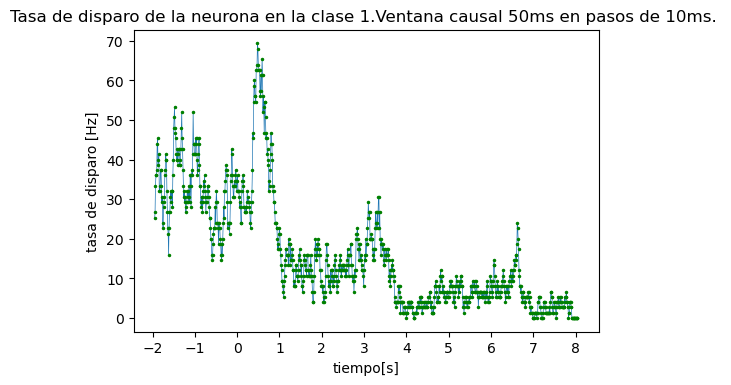

In [188]:
lista_part_x = list(np.round(np.arange(-2,9,1),4))
fig = plt.figure(dpi=100)
plt.plot(df_tasa_disparo.tiempo,df_tasa_disparo.tasa_disparo, '-',df_tasa_disparo.tiempo,df_tasa_disparo.tasa_disparo,'go',linewidth=0.5, markersize=1.5)
plt.xticks(lista_part_x)
plt.xlabel('tiempo[s]')
plt.ylabel('tasa de disparo [Hz]')
plt.title('Tasa de disparo de la neurona en la clase 1.Ventana causal 50ms en pasos de 10ms. ')
plt.show()

<h3> Clase 2

In [86]:
#Seleccionamos la segunda clase (del ensayo 15:30)
clase2 = tiempos_neudpc_1[15:30]
clase2

,0
15,"-1.9847,-1.9458,-1.821,-1.8162,-1.8099,-1.7701..."
16,"-1.9982,-1.9564,-1.9454,-1.9247,-1.9231,-1.920..."
17,"-1.9861,-1.9494,-1.8186,-1.8064,-1.7942,-1.728..."
18,"-1.9992,-1.9787,-1.9527,-1.7282,-1.6601,-1.630..."
19,"-1.9862,-1.9561,-1.9334,-1.9081,-1.8734,-1.865..."
20,"-1.9957,-1.9547,-1.9054,-1.8935,-1.8622,-1.842..."
21,"-1.999,-1.9812,-1.9383,-1.9259,-1.9241,-1.8715..."
22,"-1.799,-1.7303,-1.7076,-1.706,-1.698,-1.5689,-..."
23,"-1.9624,-1.9284,-1.8539,-1.8367,-1.796,-1.7425..."
24,"-1.9513,-1.9394,-1.9278,-1.7873,-1.7602,-1.656..."


In [258]:
#Separamos cada valor por comas de cada renglón para obtener nuestra tabla a analizar de la 2da clase 
clase2_mod = clase2[0].str.split(',', expand=True)

#Es necesario modificar los valores None por valores NaN
clase2_mod.fillna(value=np.nan,inplace=True)

In [259]:
#Cambiamos el formato de str a float ya que no son cadenas de texto si no que son flotantes 
for col in range(301):
    clase2_mod[col] = clase2_mod[col].astype(float)
clase2_mod.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
296    float64
297    float64
298    float64
299    float64
300    float64
Length: 301, dtype: object

In [260]:
#Se crea la función ventana_causal ya que se requiere de una ventana causal, cuadrada y de longitud de 50 ms.
def ventana_causal(tiempo,long_ventana):
    return tiempo + long_ventana

In [261]:
#Como posteriormente vamos a cambiar el tamaño de la ventana y del paso temporal es convenienre crear una función: 
#lista_tiempos: Recibe una lista cuyo primer elemento es una lista con el par de valor extremo(inferior), valor extremo + tamaño de ventana, en segundos.
#paso_tiempo que es la longitud de los pasos temporales (en segundos).
#lim_inferior y lim_superior son los extremos temporales de la partición.

def particiones_temporales(lista_tiempos, paso_tiempo,lim_inferior,lim_superior,long_ventana):
    rango = (abs(lim_inferior)+abs(lim_superior))/paso_tiempo
    for seg in range(int(rango)-1):
        tiempo_actual = lista_tiempos[seg][0] + paso_tiempo
        parejas_tiempo = [round(tiempo_actual,4) ,round(ventana_causal(tiempo_actual,long_ventana),4)]
        lista_tiempos.append(parejas_tiempo)
    return lista_tiempos

In [262]:
lista_tiempos= particiones_temporales([[-2,-1.95]],0.01,-2,8,0.05)

In [263]:
#Esta función permanece igual
def comparar_tiempo(lista_tiempos,lista_comparable):
    lista_coincidencias =  [0]*len(lista_tiempos)     
    for i in range(len(lista_coincidencias)):
        for p in range(len(lista_comparable)):
            if (lista_tiempos[i][0]<= lista_comparable[p] <= lista_tiempos[i][1]) == True:
                    lista_coincidencias[i] = lista_coincidencias[i] + 1
    return lista_coincidencias

In [264]:
# Para cada uno de los ensayos se tiene que encontrar el número de espigas correspondientes a cada intervalo utilizando la función comparar_tiempo
# Cada una de estas cuentas es almacenada en una lista para formar una lista de listas. 
#Creamos ahora una función que incluya la clase a analizar 
def numero_espigas_lista_de_listas(clase,lista_tiempos):
    num_ensayos = clase.shape[0]
    lista_de_listas=[]
    for i in range(num_ensayos):          #En este caso la longitud está dada por el número de ensayos de la clase 
        lista_de_listas.append(comparar_tiempo(lista_tiempos,list(clase.iloc[i])))
    return lista_de_listas

In [265]:
#Exactamente lo que se había realizado para clase1, pero ahora se generaliza con una función de acumulado de espigas
def acumulado_espigas(lista_de_listas):
    lista_suma = []
    for i in range(len(lista_de_listas[0])):
        suma=0
        for j in range(len(lista_de_listas)): 
            suma = lista_de_listas[j][i]+suma
        lista_suma.append(suma)
    return lista_suma

In [267]:
lista_de_listas = numero_espigas_lista_de_listas(clase2_mod,lista_tiempos)
lista_suma = acumulado_espigas(lista_de_listas)

In [268]:
#Calculando la tasa de disparo como : #de espigas en un periodo / ancho de la ventana(s)*cantidad de ensayos
tasa_disparo = list(map(lambda x: x/((0.05)*(15)), lista_suma))

In [269]:
def lista_extremos(lim_inferior,lim_superior,paso_tiempo):
    lista_extremos_final = []
    rango = (abs(lim_inferior)+abs(lim_superior))/paso_tiempo
    for i in range(int(rango)): 
        lista_extremos_final.append(lista_tiempos[i][1])
    return lista_extremos_final

In [270]:
lista_extremos_final = lista_extremos(-2,8,0.01)
#Creamos un diccionario con los tiempos creados por intervalos y la tasa de disparo 
tren_de_espigas ={
    'tiempo': lista_extremos_final,
    'tasa_disparo': tasa_disparo
}

In [271]:
df_tasa_disparo= pd.DataFrame(tren_de_espigas)
df_tasa_disparo

,tiempo,tasa_disparo
0,-1.95,33.333333
1,-1.94,29.333333
2,-1.93,28.000000
3,-1.92,38.666667
4,-1.91,38.666667
...,...,...
995,8.00,0.000000
996,8.01,0.000000
997,8.02,0.000000
998,8.03,0.000000


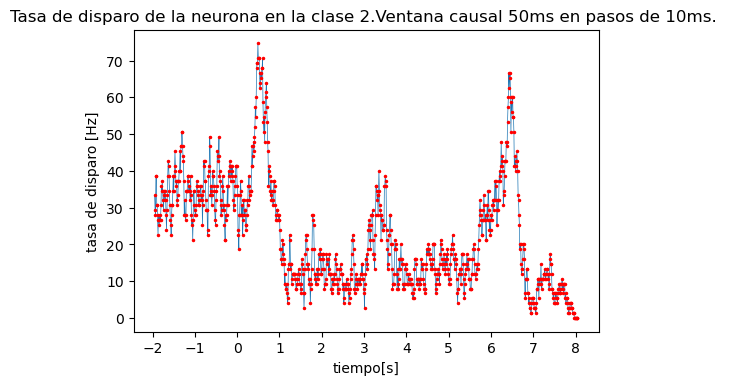

In [272]:
lista_part_x = list(np.round(np.arange(-2,9,1),4))
fig = plt.figure(dpi=100)
plt.plot(df_tasa_disparo.tiempo,df_tasa_disparo.tasa_disparo, '-',df_tasa_disparo.tiempo,df_tasa_disparo.tasa_disparo,'ro',linewidth=0.5, markersize=1.5)
plt.xticks(lista_part_x)
plt.xlabel('tiempo[s]')
plt.ylabel('tasa de disparo [Hz]')
plt.title('Tasa de disparo de la neurona en la clase 2.Ventana causal 50ms en pasos de 10ms. ')
plt.show()

<h3> Clase 3. 

In [273]:
#Seleccionamos la tercera clase (del ensayo 30:45)
clase3 = tiempos_neudpc_1[30:45]
clase3

,0
30,"-1.996,-1.9776,-1.9377,-1.9316,-1.9204,-1.91,-..."
31,"-1.9724,-1.9534,-1.9323,-1.9268,-1.9148,-1.774..."
32,"-1.9881,-1.9719,-1.9356,-1.9319,-1.9223,-1.909..."
33,"-1.981,-1.9646,-1.9587,-1.9503,-1.9438,-1.9367..."
34,"-1.9983,-1.991,-1.959,-1.9494,-1.9381,-1.8987,..."
35,"-1.9772,-1.9447,-1.9098,-1.9044,-1.8428,-1.776..."
36,"-1.9722,-1.9202,-1.9153,-1.907,-1.9033,-1.8789..."
37,"-1.9844,-1.9663,-1.9609,-1.8972,-1.8454,-1.835..."
38,"-1.9009,-1.8213,-1.7973,-1.7858,-1.7461,-1.675..."
39,"-1.9988,-1.9858,-1.9701,-1.9527,-1.8732,-1.867..."


In [274]:
#Separamos cada valor por comas de cada renglón para obtener nuestra tabla a analizar de la 3ra clase 
clase3_mod = clase3[0].str.split(',', expand=True)

#Es necesario modificar los valores None por valores NaN
clase3_mod.fillna(value=np.nan,inplace=True)

In [275]:
#Cambiamos el formato de str a float ya que no son cadenas de texto si no que son flotantes 
for col in range(281):
    clase3_mod[col] = clase3_mod[col].astype(float)
clase3_mod.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
276    float64
277    float64
278    float64
279    float64
280    float64
Length: 281, dtype: object

In [276]:
lista_tiempos = particiones_temporales([[-2,-1.95]],0.01,-2,8,0.05)

In [277]:
lista_de_listas = numero_espigas_lista_de_listas(clase3_mod,lista_tiempos)
lista_suma = acumulado_espigas(lista_de_listas)

In [278]:
#Calculando la tasa de disparo como : #de espigas en un periodo / ancho de la ventana(s)*cantidad de ensayos
tasa_disparo = list(map(lambda x: x/((0.05)*(15)), lista_suma))

In [279]:
def lista_extremos(lim_inferior,lim_superior,paso_tiempo):
    lista_extremos_final = []
    rango = (abs(lim_inferior)+abs(lim_superior))/paso_tiempo
    for i in range(int(rango)): 
        lista_extremos_final.append(lista_tiempos[i][1])
    return lista_extremos_final

In [280]:
lista_extremos_final = lista_extremos(-2,8,0.01)
#Creamos un diccionario con los tiempos creados por intervalos y la tasa de disparo 
tren_de_espigas ={
    'tiempo': lista_extremos_final,
    'tasa_disparo': tasa_disparo
}

In [281]:
df_tasa_disparo= pd.DataFrame(tren_de_espigas)
df_tasa_disparo

,tiempo,tasa_disparo
0,-1.95,41.333333
1,-1.94,42.666667
2,-1.93,49.333333
3,-1.92,46.666667
4,-1.91,45.333333
...,...,...
995,8.00,0.000000
996,8.01,0.000000
997,8.02,0.000000
998,8.03,0.000000


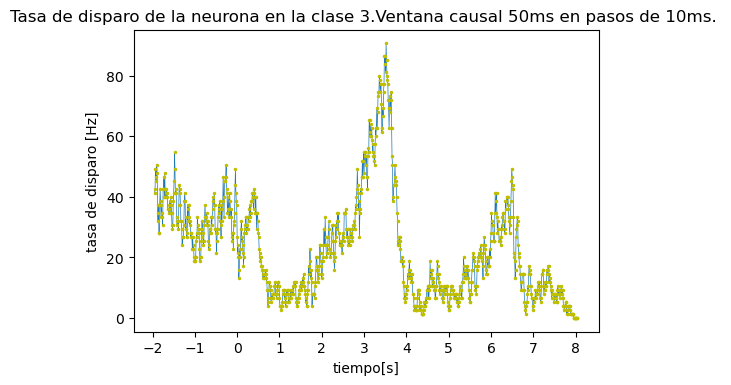

In [284]:
lista_part_x = list(np.round(np.arange(-2,9,1),4))
fig = plt.figure(dpi=100)
plt.plot(df_tasa_disparo.tiempo,df_tasa_disparo.tasa_disparo, '-',df_tasa_disparo.tiempo,df_tasa_disparo.tasa_disparo,'yo',linewidth=0.5, markersize=1.5)
plt.xticks(lista_part_x)
plt.xlabel('tiempo[s]')
plt.ylabel('tasa de disparo [Hz]')
plt.title('Tasa de disparo de la neurona en la clase 3.Ventana causal 50ms en pasos de 10ms. ')
plt.show()

<h3> Clase 4. 

In [285]:
#Seleccionamos la cuarta clase (del ensayo 45:60)
clase4 = tiempos_neudpc_1[45:60]
clase4

,0
45,"-1.9923,-1.9733,-1.9303,-1.9247,-1.7715,-1.645..."
46,"-1.9875,-1.9782,-1.9326,-1.8628,-1.8448,-1.829..."
47,"-1.9439,-1.9257,-1.9138,-1.9112,-1.9048,-1.865..."
48,"-1.9896,-1.9818,-1.7404,-1.6883,-1.6595,-1.631..."
49,"-1.979,-1.8565,-1.7766,-1.7651,-1.6844,-1.6662..."
50,"-1.9818,-1.9701,-1.9484,-1.8601,-1.852,-1.8001..."
51,"-1.9797,-1.7576,-1.5833,-1.5529,-1.4459,-1.430..."
52,"-1.9764,-1.9512,-1.937,-1.8852,-1.8819,-1.8627..."
53,"-1.9489,-1.9125,-1.8622,-1.8122,-1.7923,-1.767..."
54,"-1.9885,-1.9664,-1.9475,-1.8995,-1.8821,-1.839..."


In [286]:
#Separamos cada valor por comas de cada renglón para obtener nuestra tabla a analizar de la 4ta clase 
clase4_mod = clase4[0].str.split(',', expand=True)

#Es necesario modificar los valores None por valores NaN
clase4_mod.fillna(value=np.nan,inplace=True)

In [288]:
#Cambiamos el formato de str a float ya que no son cadenas de texto si no que son flotantes 
for col in range(238):
    clase4_mod[col] = clase4_mod[col].astype(float)
clase4_mod.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
233    float64
234    float64
235    float64
236    float64
237    float64
Length: 238, dtype: object

In [289]:
lista_tiempos = particiones_temporales([[-2,-1.95]],0.01,-2,8,0.05)

In [292]:
lista_de_listas = numero_espigas_lista_de_listas(clase4_mod,lista_tiempos)
lista_suma = acumulado_espigas(lista_de_listas)

#Calculando la tasa de disparo como : #de espigas en un periodo / ancho de la ventana(s)*cantidad de ensayos
tasa_disparo = list(map(lambda x: x/((0.05)*(15)), lista_suma))

lista_extremos_final = lista_extremos(-2,8,0.01)
#Creamos un diccionario con los tiempos creados por intervalos y la tasa de disparo 
tren_de_espigas ={
    'tiempo': lista_extremos_final,
    'tasa_disparo': tasa_disparo
}

In [293]:
df_tasa_disparo= pd.DataFrame(tren_de_espigas)
df_tasa_disparo

,tiempo,tasa_disparo
0,-1.95,25.333333
1,-1.94,28.000000
2,-1.93,26.666667
3,-1.92,21.333333
4,-1.91,28.000000
...,...,...
995,8.00,0.000000
996,8.01,0.000000
997,8.02,0.000000
998,8.03,0.000000


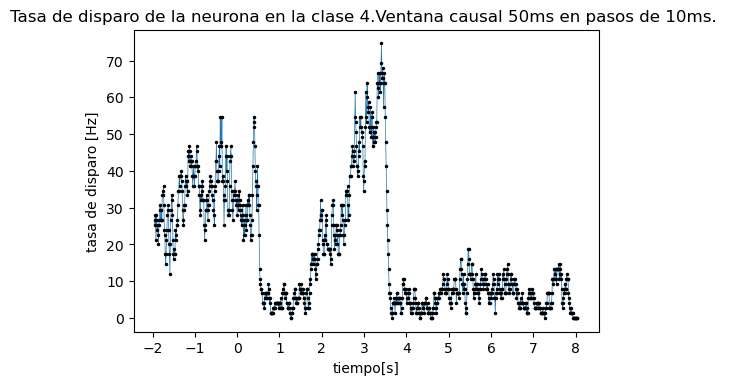

In [294]:
lista_part_x = list(np.round(np.arange(-2,9,1),4))
fig = plt.figure(dpi=100)
plt.plot(df_tasa_disparo.tiempo,df_tasa_disparo.tasa_disparo, '-',df_tasa_disparo.tiempo,df_tasa_disparo.tasa_disparo,'ko',linewidth=0.5, markersize=1.5)
plt.xticks(lista_part_x)
plt.xlabel('tiempo[s]')
plt.ylabel('tasa de disparo [Hz]')
plt.title('Tasa de disparo de la neurona en la clase 4.Ventana causal 50ms en pasos de 10ms. ')
plt.show()